# Looking at 'MATERIAL FAILURE OF PIPE OR WELD' incident "cause" to find the most expensive accidents
Data Source

In [3]:
import pandas as pd
import numpy as np
import os

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
df = pd.read_csv('../data/processed/pipeline_incidents_2010_to_present.csv')
df.head()

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,15,16,18,19,20,21,22,25,26,27,28,30,31,32,33,36,56,57,58,63,64,65,72,73,75,76,77,78,87,89,92,93,94,95,101,102,103,104,105,106,108,109,120,148,149,151,152,154,171,172,173,174,193,194,197,198,205,214,217,218,219,225,233,234,238,239,240,251,252,256,257,265,266,268,269,276,277,278,279,280,281,290,293,294,295,296,297,300,301,303,304,305,306,307,310,311,313,314,315,316,317,318,319,320,321,322,324,325,326,327,329,330,331,332,333,334,335,336,341,342,343,344,345,347,348,351,354,355,357,359,363,366,367,368,369,371,372,373,374,375,376,377,378,379,380,385,386,387,393,400,401,407,421,422,423,427,428,429,430,432,434,435,436,439,440,441,443,446,447,449,451,452,454,455,456,457,460,462,463,464,465,466,472,473,474,480,482,488,489,490,491,492,493,503,510,512,516,517,518,522,526,529,530,532,533,535,537,539,540,543,545,546,547,548,549,550,552,557,558,559,561,562,566,567,5

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,...,root_cause_type_other,failure_type,pwf_addl_misalignment_ind,failure_details,ief_addl_misalignment_ind,additional_thermal_ind,spill_type_category,eqf_pump_equipment_ind,io_tank_vessel_ind,prepared_date
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/28/22,NO,YES,YES,20100004,15003,3/16/10,ORIGINAL FINAL,13710,NORTHERN ILLINOIS GAS CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/28/22,NO,YES,YES,20100005,15639,3/22/10,SUPPLEMENTAL FINAL,6141,NEW MEXICO GAS COMPANY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/28/22,NO,YES,NO,20100006,15422,3/24/10,SUPPLEMENTAL FINAL,31636,NORTHERN STATES POWER CO OF MINNESOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/28/22,NO,YES,YES,20100007,15007,3/24/10,ORIGINAL FINAL,5300,"FLORENCE GAS DEPT, CITY OF",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Finding some initial conclusions: 
* Out of 3537 incidents, 417 were caused from "material failure or pipe weld," or roughly 12% of incidents
* From these 417, the majority (298) were related to construction, installation, or original manufacturing 
* 52 were related to "environmental cracking-related"
* Incidents labeled as "evnironmental cracking-related" have almost twice the total clean-up/repair cost (adjusted for inflation) than the next-most expensive subcause ('butt weld') 


In [5]:
# How many incidents are caused by a material failure?
df[df['cause'] == 'MATERIAL FAILURE OF PIPE OR WELD'].shape

(417, 826)

In [6]:
# Number of incidents in the dataset
df.shape

(3537, 826)

In [7]:
# What are the subcauses associated with a material failure? (i.e. underlying causes)
df2 = df[df['cause'] == 'MATERIAL FAILURE OF PIPE OR WELD']
df2.cause_details.value_counts()

CONSTRUCTION-, INSTALLATION-, OR FABRICATION-RELATED                                  119
ORIGINAL MANUFACTURING-RELATED (NOT GIRTH WELD OR OTHER WELDS FORMED IN THE FIELD)    100
DESIGN-, CONSTRUCTION-, INSTALLATION-, OR FABRICATION-RELATED                          79
ENVIRONMENTAL CRACKING-RELATED                                                         52
MECHANICAL JOINT FAILURE                                                               20
BODY OF PIPE                                                                           17
FUSION JOINT                                                                           16
OTHER PIPE, WELD, OR JOINT FAILURE                                                     11
BUTT WELD                                                                               3
Name: cause_details, dtype: int64

In [8]:
# Which of these subcauses are the most expensive? 
df2.groupby(by='cause_details').total_cost_current.median().sort_values(ascending=False)

cause_details
ENVIRONMENTAL CRACKING-RELATED                                                        934124.86210
BUTT WELD                                                                             528355.53410
ORIGINAL MANUFACTURING-RELATED (NOT GIRTH WELD OR OTHER WELDS FORMED IN THE FIELD)    452122.95360
BODY OF PIPE                                                                          345139.06390
DESIGN-, CONSTRUCTION-, INSTALLATION-, OR FABRICATION-RELATED                         280231.59030
MECHANICAL JOINT FAILURE                                                              278231.94015
CONSTRUCTION-, INSTALLATION-, OR FABRICATION-RELATED                                  272849.25040
FUSION JOINT                                                                          222149.09195
OTHER PIPE, WELD, OR JOINT FAILURE                                                    160166.74750
Name: total_cost_current, dtype: float64

<AxesSubplot:title={'center':'Median cost of pipeline incidents causes by material failure'}, ylabel='cause_details'>

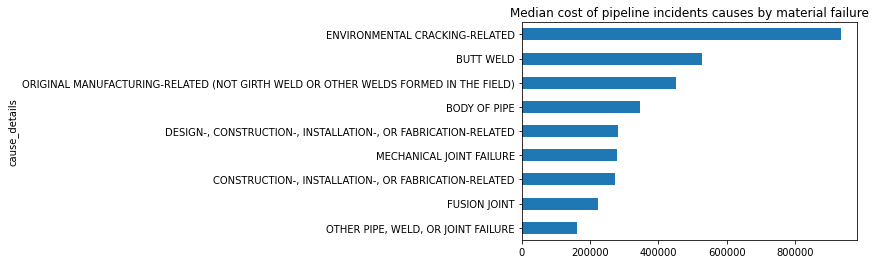

In [9]:
# Let's look at the above with a plot 
df2.groupby(by='cause_details').total_cost_current.median()\
    .sort_values(ascending=False)\
    .sort_values().plot(kind='barh', title='Median cost of pipeline incidents causes by material failure')

## Now let's look at some specific incidents and see what happened
Most expensive incident report numbers: 
* 19909	
* 17044
* 31393
* 35187
* 31163
* 33676
* 20932
* 19624
* 33647
* 20201


In [17]:
# Sorting our dataframe of material failure incidents by highest total cost (adjusted for inflation)
df2.sort_values('total_cost_current', ascending=False).head(10)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,...,root_cause_type_other,failure_type,pwf_addl_misalignment_ind,failure_details,ief_addl_misalignment_ind,additional_thermal_ind,spill_type_category,eqf_pump_equipment_ind,io_tank_vessel_ind,prepared_date
1783,2/28/22,NaN,YES,NO,20100181,19909,8/25/10,SUPPLEMENTAL FINAL,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",...,NaN,ENVIRONMENTAL CRACKING-RELATED,NaN,NaN,NaN,NaN,LARGE,NaN,NaN,11/19/14
832,2/28/22,NaN,YES,YES,20100070,17044,10/13/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,2/28/22,NaN,YES,NO,20130151,31393,4/26/13,SUPPLEMENTAL FINAL,12628,MOBIL PIPE LINE COMPANY,...,NaN,ORIGINAL MANUFACTURING-RELATED (NOT GIRTH WELD...,NaN,NaN,NaN,NaN,LARGE,NaN,NaN,12/21/18
3344,2/28/22,NaN,YES,NO,20200253,35187,9/13/20,SUPPLEMENTAL,2552,COLONIAL PIPELINE CO,...,NaN,ENVIRONMENTAL CRACKING-RELATED,NaN,NaN,NaN,NaN,LARGE,NaN,NaN,4/17/21
2940,2/28/22,NaN,YES,NO,20170417,31163,12/16/17,SUPPLEMENTAL FINAL,32334,TC OIL PIPELINE OPERATIONS INC,...,NaN,"CONSTRUCTION-, INSTALLATION-, OR FABRICATION-R...",NaN,NaN,NaN,NaN,LARGE,NaN,NaN,11/9/18
3227,2/28/22,NaN,YES,NO,20190359,33676,11/26/19,SUPPLEMENTAL FINAL,32334,TC OIL PIPELINE OPERATIONS INC,...,NaN,ORIGINAL MANUFACTURING-RELATED (NOT GIRTH WELD...,YES,NaN,NaN,NaN,LARGE,NaN,NaN,5/1/20
2399,2/28/22,NaN,YES,NO,20140393,20932,11/10/14,SUPPLEMENTAL FINAL,31554,CHEVRON PETROCHEMICAL PIPELINE LLC,...,NaN,ORIGINAL MANUFACTURING-RELATED (NOT GIRTH WELD...,NaN,NaN,NaN,NaN,LARGE,NaN,NaN,11/24/15
2048,2/28/22,NaN,YES,NO,20120238,19624,8/16/12,SUPPLEMENTAL FINAL,22430,WEST SHORE PIPELINE CO,...,NaN,ORIGINAL MANUFACTURING-RELATED (NOT GIRTH WELD...,YES,NaN,NaN,NaN,LARGE,NaN,NaN,8/1/14
2562,2/28/22,NaN,YES,NO,20150367,33647,10/20/15,SUPPLEMENTAL FINAL,2552,COLONIAL PIPELINE CO,...,NaN,"CONSTRUCTION-, INSTALLATION-, OR FABRICATION-R...",NaN,NaN,NaN,NaN,LARGE,NaN,NaN,4/24/20
2400,2/28/22,NaN,YES,NO,20140394,20201,11/11/14,SUPPLEMENTAL FINAL,12470,MID - VALLEY PIPELINE CO,...,NaN,ENVIRONMENTAL CRACKING-RELATED,NaN,NaN,NaN,NaN,LARGE,NaN,NaN,3/3/15


In [18]:
# Double checking the above
df2.total_cost_current.sort_values(ascending=False)

1783    1.023097e+09
832     6.794712e+08
2159    1.049986e+08
3344    6.553451e+07
2940    4.861148e+07
            ...     
3180    1.040697e+04
2662    9.388155e+03
518     5.848181e+03
3273    1.529914e+03
35      0.000000e+00
Name: total_cost_current, Length: 417, dtype: float64

In [2]:
# Making the top 10 its own dataframe 

top = df2.sort_values('total_cost_current', ascending=False).head(10)
#top.to_csv('top_material_failure_incidents_2010_to_present.csv', index=False)

NameError: name 'df2' is not defined

## Looking Material Failure incidents over time


In [ ]:
#df[["col1", "col2", "col3"]] = df[["col1", "col2", "col3"]].apply(pd.to_datetime)

df2['installation_year']

In [22]:
df2.incident_identified_datetime

7        1/12/10 20:53
22       1/21/10 17:37
28        9/6/10 23:38
35        3/3/10 13:28
47         1/1/11 4:55
             ...      
3504    10/14/21 11:40
3505     10/17/21 9:00
3517     12/4/21 11:18
3524    12/21/21 18:48
3526     12/8/21 10:22
Name: incident_identified_datetime, Length: 417, dtype: object

In [23]:
df2[['incident_identified_datetime', 'installation_year']] = df2[['incident_identified_datetime', 'installation_year']].apply(pd.to_datetime, errors='coerce')



/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:xlabel='incident_identified_datetime'>

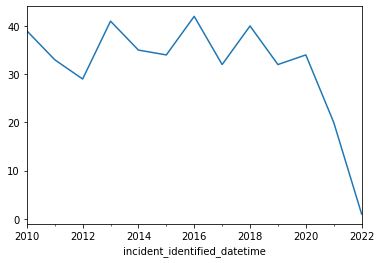

In [34]:
# Number of incidents by year
df2.resample('Y', on='incident_identified_datetime').size().plot()


<AxesSubplot:>

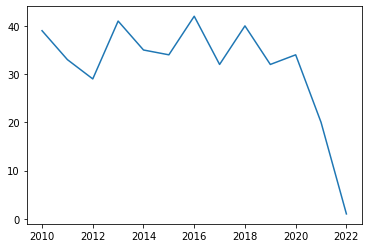

In [35]:
# Number of incidents by year
df2.incident_identified_datetime.dt.year.value_counts().sort_index().plot()

<AxesSubplot:>

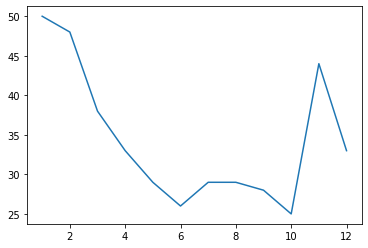

In [36]:
# Number of incidents by month 
df2.incident_identified_datetime.dt.month.value_counts().sort_index().plot()


<AxesSubplot:title={'center':'Pipeline installation year for pipielines with a material failure incident from 2010 to present'}>

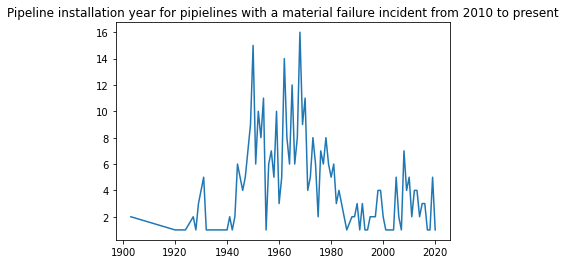

In [43]:
# Most Material Failure incidents occur in pipelines build between 1940 and 1980, 
    # but there also seems ot be a spike in the 2000s as well 
df2.installation_year.dt.year.value_counts().sort_index().plot(title='Pipeline installation year for pipielines with a material failure incident from 2010 to present')